In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil
import time
import copy

In [2]:
# !git clone https://github.com/prajnasb/observations

### Creating image datasets an data loaders for train and test using the experiments folder split

In [3]:
experiments_path = r"C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder"
data_path = r"C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data"

In [4]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(), 
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]), 
    'test' : transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [5]:
def get_train_files_path(experiments_path, data_path, phase):
    if phase == 'train':
        file_name = 'train.csv'
    elif phase == 'test':
        file_name = 'test.csv'
    else:
        print("phase can only have train and test as parameter values")
        exit()
    file_path = os.path.join(experiments_path, file_name)
    train_df = pd.read_csv(file_path, delimiter=',')
    files_path = []
    fonts_class = []
    for row in train_df.iterrows():
        files_path.append(os.path.join(data_path, row[1]['class'], row[1]['filename']))
        fonts_class.append(row[1]['class'])
    
    return files_path, fonts_class

In [6]:
def copy_images_to_path(file_path, file_class, destination_dir):
    font_folder = os.path.join(destination_dir, file_class)
    if os.path.exists(font_folder) == False:
        os.makedirs(font_folder)
    
    print("File being copied from {}:{}".format(file_path, font_folder))
    shutil.copy(file_path, font_folder)
    #shutil.copyfile(file_path, font_folder)
    

In [7]:
X_train, y_train = get_train_files_path(experiments_path, data_path, phase='train')
X_test, y_test = get_train_files_path(experiments_path, data_path, phase='test')

In [8]:
train_dir = os.path.join(experiments_path, 'train')
test_dir = os.path.join(experiments_path, 'test')

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

In [9]:
for file_path, font_class in zip(X_train, y_train):
    copy_images_to_path(file_path, font_class, train_dir)

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\0-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\10-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\100-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\O

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\125-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\126-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\128-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesi

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\151-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\152-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\153-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesi

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\179-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\18-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\180-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\209-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\21-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\212-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\238-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\239-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\24-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\270-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\272-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\273-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesi

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\299-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\3-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\301-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\335-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\336-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\338-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesi

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\376-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\377-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\378-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesi

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\401-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\405-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\406-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesi

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\432-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\434-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\435-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesi

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\463-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\466-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\467-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesi

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\68-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\7-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\70-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Ob

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\96-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\97-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\99-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\O

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_115.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_116.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_117.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Dig

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_135.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_136.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_137.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Dig

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_155.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_156.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_157.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Dig

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_175.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_176.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_177.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Dig

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_195.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_196.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_197.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Dig

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_214.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_215.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_216.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Dig

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_24.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_240.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_242.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digi

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_268.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_27.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_270.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digi

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_303.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_305.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_306.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Dig

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_43.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_44.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_45.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digita

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_63.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_64.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_65.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digita

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_83.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_84.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\augmented_image_85.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digita

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\105.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\106.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\107.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detect

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\132.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\135.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\136.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detect

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\16.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\160.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\162.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detecti

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\191.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\192.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\194.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detect

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\221.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\222.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\223.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detect

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\248.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\249.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\250.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detect

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\280.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\281.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\283.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detect

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\315.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\316.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\317.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detect

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\349.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\350.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\351.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detect

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\383.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\385.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\386.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detect

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\411.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\412.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\413.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detect

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\439.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\44.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\441.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detecti

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\467.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\468.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\47.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detecti

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\70.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\73.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\76.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_101.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_103.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_105.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_125.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_126.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_127.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_144.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_145.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_147.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_166.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_168.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_169.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_186.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_187.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_188.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_206.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_207.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_208.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_23.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_230.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_231.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_252.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_253.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_254.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_277.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_278.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_279.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_3.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_30.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_301.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gm

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_32.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_33.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_35.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gm

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_55.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_56.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_57.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gm

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_76.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_77.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_78.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gm

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_97.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_98.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\augmented_image_99.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gm

In [10]:
for file_path, font_class in zip(X_test, y_test):
    copy_images_to_path(file_path, font_class, test_dir)

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\1-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\106-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\11-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Obj

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\211-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\219-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\229-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\318-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\319-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\325-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\409-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\421-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\427-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\51-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\57-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\with_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\with_mask\62-with-mask.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Obj

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\166.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\168.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\173.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detectio

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\284.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\295.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\298.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detectio

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\362.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\368.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\37.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection

File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\451.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\457.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test\without_mask
File being copied from C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\data\without_mask\459.jpg:C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detectio

In [11]:
image_datasets = {x: datasets.ImageFolder(os.path.join(experiments_path, x), data_transforms[x]) for x in ['train', 'test']}

In [12]:
image_datasets['train']

Dataset ImageFolder
    Number of datapoints: 1315
    Root location: C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [13]:
image_datasets['test']

Dataset ImageFolder
    Number of datapoints: 194
    Root location: C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\experiements\dest_folder\test
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [14]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], 
                                             batch_size=8, 
                                             shuffle=True, 
                                             num_workers=4) 
               for x in ['train', 'test']}

In [15]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x2899a0e65c8>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x2899a0e6708>}

In [16]:
class_names = image_datasets['train'].classes

In [17]:
class_names

['with_mask', 'without_mask']

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [19]:
device

device(type='cuda', index=0)

In [20]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}

### Visualizing images

In [21]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(20,20))
    plt.imshow(inp)

    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    

In [22]:
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)

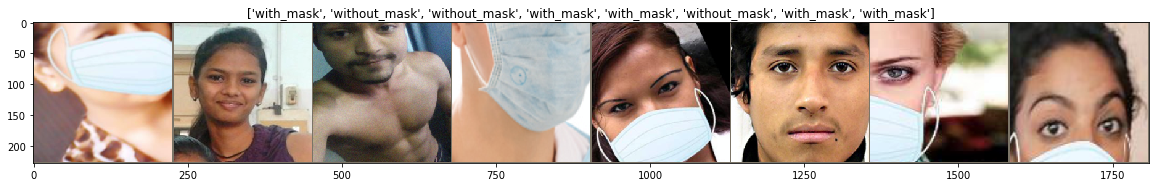

In [23]:
imshow(out, title=[class_names[x] for x in classes])

### Training the model

In [24]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    since = time.time()
    best_acc = 0.0
    best_model = copy.deepcopy(model.state_dict())
    
    new_freeze_state = None
    prev_freeze_state = False
    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs - 1))
        print('-' * 10)
        
        for phase in ['train', 'test']:
            if phase == 'train':
                scheduler.step()
                model.train()
            else:
                model.eval()
                
            running_loss = 0.0
            running_corrects = 0
        
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc:{:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model = copy.deepcopy(model.state_dict())
            
            print()
    
    time_elapsed = time.time() - since
    print('Training complete in {:0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))
    print('Best val acc: {:4f}'.format(best_acc))
    
    model.load_state_dict(best_model)
    return model
                

In [25]:
import ssl

In [26]:
ssl._create_default_https_context = ssl._create_unverified_context

In [27]:
model_ft = models.mobilenet_v2(pretrained=True)
# model_ft = models.resnet18(pretrained=True)

# num_frts = model_ft.fc.in_features
# model_ft.fc = nn.Linear(num_frts, len(class_names))

num_frts = model_ft.classifier[1].in_features #mobilenet
model_ft.classifier[1] = nn.Linear(num_frts, len(class_names))


model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()

#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)
optimizer_ft = optim.Adagrad(model_ft.parameters(), lr=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [28]:
print(model_ft)

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

)


In [29]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=20)

Epoch 0/19
----------


C:\Users\aiforesee\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\torch\optim\lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.1988 Acc:0.9163

test Loss: 0.0019 Acc:1.0000

Epoch 1/19
----------
train Loss: 0.1230 Acc:0.9414

test Loss: 0.0021 Acc:1.0000

Epoch 2/19
----------
train Loss: 0.1321 Acc:0.9437

test Loss: 0.0013 Acc:1.0000

Epoch 3/19
----------
train Loss: 0.1045 Acc:0.9536

test Loss: 0.0015 Acc:1.0000

Epoch 4/19
----------
train Loss: 0.0775 Acc:0.9658

test Loss: 0.0006 Acc:1.0000

Epoch 5/19
----------
train Loss: 0.0986 Acc:0.9582

test Loss: 0.0071 Acc:1.0000

Epoch 6/19
----------
train Loss: 0.1046 Acc:0.9513

test Loss: 0.0012 Acc:1.0000

Epoch 7/19
----------
train Loss: 0.1205 Acc:0.9490

test Loss: 0.0011 Acc:1.0000

Epoch 8/19
----------
train Loss: 0.0865 Acc:0.9559

test Loss: 0.0008 Acc:1.0000

Epoch 9/19
----------
train Loss: 0.0932 Acc:0.9574

test Loss: 0.0010 Acc:1.0000

Epoch 10/19
----------
train Loss: 0.0975 Acc:0.9513

test Loss: 0.0006 Acc:1.0000

Epoch 11/19
----------
train Loss: 0.0859 Acc:0.9627

test Loss: 0.0005 Acc:1.0000

Epoch 12/19
----------
t

In [30]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
#     fig = plt.figure(figsize=(10,10))
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            print(preds,"predicitons")
            
            
            for j in range(inputs.size()[0]):
#                 images_so_far +=1
#                 ax = plt.subplot(num_images//len(labels)-1, len(labels), images_so_far)
#                 ax.axis('off')
#                 ax.set_title('true: {} predicted: {}'.format(class_names[labels[j]], class_names[preds[j]]))
                print('true: {} predicted: {}'.format(class_names[labels[j]], class_names[preds[j]]))
#                 imshow(inputs.cpu().data[j])
                
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [34]:
torch.save(model_ft, r"C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\Digital Rise Indonesia\Object Detection\Masker Detection - Resnet\mask_classifier\mask2_model.pth")

In [35]:
visualize_model(model_ft)

tensor([0, 1, 0, 0, 1, 0, 1, 0], device='cuda:0') predicitons
true: with_mask predicted: with_mask
true: without_mask predicted: without_mask
true: with_mask predicted: with_mask
true: with_mask predicted: with_mask
true: without_mask predicted: without_mask
true: with_mask predicted: with_mask
true: without_mask predicted: without_mask
true: with_mask predicted: with_mask
tensor([0, 1, 0, 1, 1, 1, 0, 0], device='cuda:0') predicitons
true: with_mask predicted: with_mask
true: without_mask predicted: without_mask
true: with_mask predicted: with_mask
true: without_mask predicted: without_mask
true: without_mask predicted: without_mask
true: without_mask predicted: without_mask
true: with_mask predicted: with_mask
true: with_mask predicted: with_mask
tensor([1, 0, 1, 1, 0, 1, 0, 0], device='cuda:0') predicitons
true: without_mask predicted: without_mask
true: with_mask predicted: with_mask
true: without_mask predicted: without_mask
true: without_mask predicted: without_mask
true: with_mas

true: without_mask predicted: without_mask
true: with_mask predicted: with_mask
true: with_mask predicted: with_mask
true: without_mask predicted: without_mask
true: without_mask predicted: without_mask
true: with_mask predicted: with_mask
tensor([1, 1, 0, 1, 0, 0, 0, 1], device='cuda:0') predicitons
true: without_mask predicted: without_mask
true: without_mask predicted: without_mask
true: with_mask predicted: with_mask
true: without_mask predicted: without_mask
true: with_mask predicted: with_mask
true: with_mask predicted: with_mask
true: with_mask predicted: with_mask
true: without_mask predicted: without_mask
tensor([0, 1, 1, 1, 0, 1, 0, 0], device='cuda:0') predicitons
true: with_mask predicted: with_mask
true: without_mask predicted: without_mask
true: without_mask predicted: without_mask
true: without_mask predicted: without_mask
true: with_mask predicted: with_mask
true: without_mask predicted: without_mask
true: with_mask predicted: with_mask
true: with_mask predicted: with_m